**Name:** Mehakk Lunkar<br>
**Registration No.:** 2448531<br>
**Lab-6:** Dynamic Time Warping (DTW)<br>

Vector 1:<br>
[2,3, 4, 6, 8, 7, 6, 5, 4, 3, 2]<br>
Vector 2:<br>
[2,4,6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1]<br>
Vector 2 is a stretched and slightly shifted version of Vector 1. Then, analyze the alignment of these two vectors using Dynamic Time
Warping (DTW).<br>
(a) Plot both vectors to visualize their patterns.

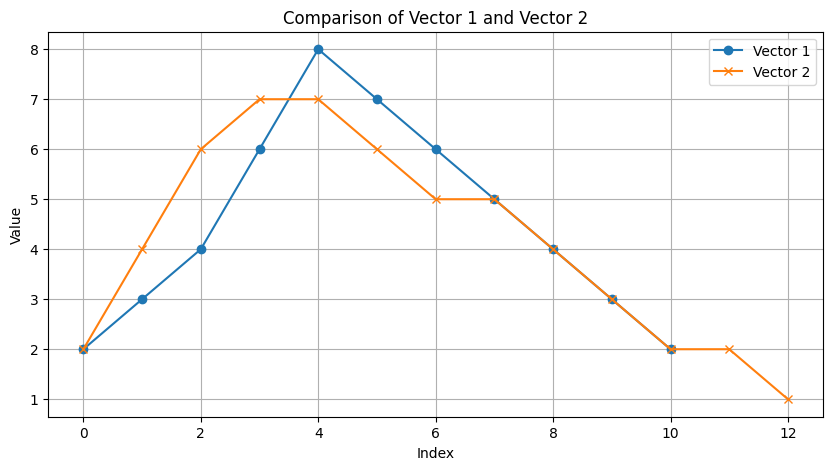

In [1]:
import matplotlib.pyplot as plt

vector1 = [2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2]
vector2 = [2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1]

plt.figure(figsize=(10,5))
plt.plot(vector1, label='Vector 1', marker='o')
plt.plot(vector2, label='Vector 2', marker='x')
plt.title('Comparison of Vector 1 and Vector 2')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

(b) Implement Dynamic Time Warping (DTW) algorithm

(c) Compute the accumulated cost matrix

In [2]:
import numpy as np

def dtw(x, y):
    n = len(x)
    m = len(y)
    dtw_matrix = np.zeros((n+1,m+1))

    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i][j] = float('inf')
    dtw_matrix[0][0] = 0

    for i in range(1,n+1):
        for j in range(1,m+1):
            cost = abs(x[i-1] - y[j-1])
            dtw_matrix[i][j] = cost + min(dtw_matrix[i-1][j],     # insertion
                                           dtw_matrix[i][j-1],     # deletion
                                           dtw_matrix[i-1][j-1])   # match
    return dtw_matrix

dtw_matrix = dtw(vector1, vector2)
dtw_matrix

array([[ 0., inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf],
       [inf,  0.,  2.,  6., 11., 16., 20., 23., 26., 28., 29., 29., 29.,
        30.],
       [inf,  1.,  1.,  4.,  8., 12., 15., 17., 19., 20., 20., 21., 22.,
        24.],
       [inf,  3.,  1.,  3.,  6.,  9., 11., 12., 13., 13., 14., 16., 18.,
        21.],
       [inf,  7.,  3.,  1.,  2.,  3.,  3.,  4.,  5.,  7., 10., 14., 18.,
        23.],
       [inf, 13.,  7.,  3.,  2.,  3.,  5.,  6.,  7.,  9., 12., 16., 20.,
        25.],
       [inf, 18., 10.,  4.,  2.,  2.,  3.,  5.,  7., 10., 13., 17., 21.,
        26.],
       [inf, 22., 12.,  4.,  3.,  3.,  2.,  3.,  4.,  6.,  9., 13., 17.,
        22.],
       [inf, 25., 13.,  5.,  5.,  5.,  3.,  2.,  2.,  3.,  5.,  8., 11.,
        15.],
       [inf, 27., 13.,  7.,  8.,  8.,  5.,  3.,  3.,  2.,  3.,  5.,  7.,
        10.],
       [inf, 28., 14., 10., 11., 12.,  8.,  5.,  5.,  3.,  2.,  3.,  4.,
         6.],
       [inf, 28., 16., 14., 15., 16., 12., 

(d) Find and visualize the warping path.

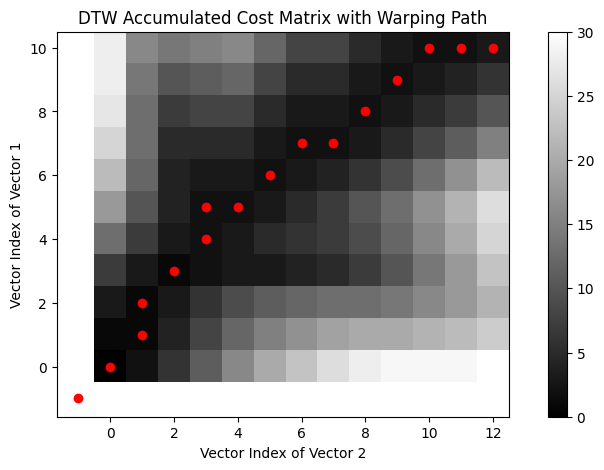

In [3]:
def get_warping_path(dtw_matrix):
    i = len(dtw_matrix) - 1
    j = len(dtw_matrix[0]) - 1
    path = [(i-1,j-1)]

    while i > 0 and j > 0:
        current_cost = dtw_matrix[i][j]
        if current_cost == dtw_matrix[i-1][j] + abs(vector1[i-1] - vector2[j-1]):
            i -= 1
        elif current_cost == dtw_matrix[i][j-1] + abs(vector1[i-1] - vector2[j-1]):
            j -= 1
        else:
            i -= 1
            j -= 1
        path.append((i-1,j-1))

    return path[::-1]

warping_path = get_warping_path(dtw_matrix)

# Visualizing the warping path
plt.figure(figsize=(10,5))
plt.imshow(dtw_matrix[1:,1:], origin='lower', cmap='gray', interpolation='nearest')
for (i,j) in warping_path:
    plt.plot(j,i,'ro') # plot warping path
plt.title('DTW Accumulated Cost Matrix with Warping Path')
plt.xlabel('Vector Index of Vector 2')
plt.ylabel('Vector Index of Vector 1')
plt.colorbar()
plt.show()

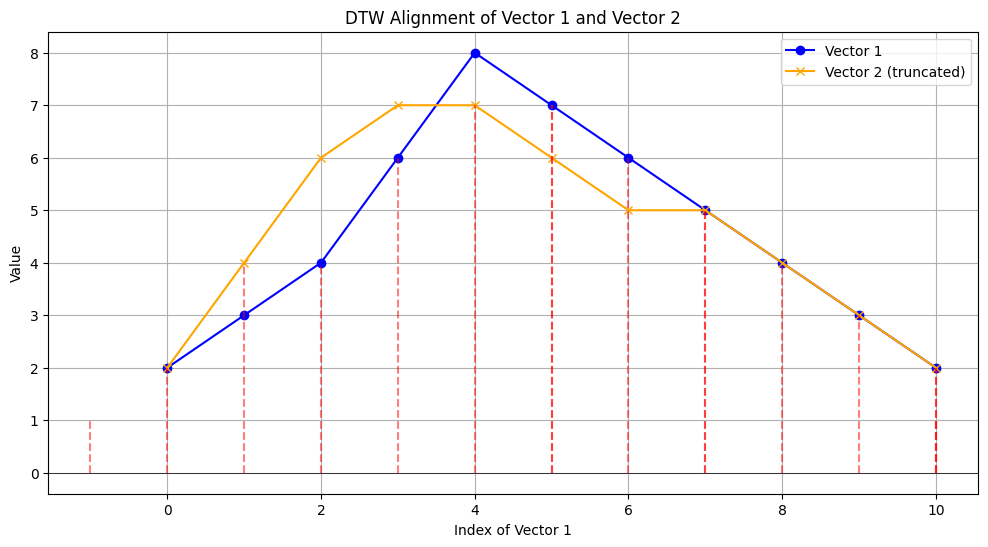

In [4]:
plt.figure(figsize=(12,6))
plt.plot(vector1, label='Vector 1', marker='o', color='blue')
plt.plot(vector2[:len(vector1)], label='Vector 2 (truncated)', marker='x', color='orange') # Truncate for alignment

# Overlaying the warping path
for (i,j) in warping_path:
    plt.plot([i]*2, [0, vector2[j]], color='red', linestyle='--', alpha=0.5) # Vertical lines from Vector 2 to Vector 1

plt.title('DTW Alignment of Vector 1 and Vector 2')
plt.xlabel('Index of Vector 1')
plt.ylabel('Value')
plt.axhline(0, color='black', linewidth=0.5) # Add a horizontal line at y=0 for reference
plt.legend()
plt.grid()
plt.show()

(e) Calculate the DTW distance between the vectors.

In [5]:
dtw_distance = dtw_matrix[len(vector1)][len(vector2)]
print("DTW Distance:", dtw_distance)

DTW Distance: 3.0


(f) Write an inference on how does the warping path align the two vectors and What does the DTW distance indicate about their similarity?

The warping path obtained from DTW illustrates how elements from Vector 2 align with those from Vector 1. This alignment allows for stretching and compressing time indices to minimize distance discrepancies between corresponding points. The DTW distance quantifies how similar the two vectors are; a lower distance indicates greater similarity. In this case:

The warping path shows that even though Vector 2 is stretched and shifted compared to Vector 1, DTW successfully aligns their patterns.
The calculated DTW distance provides a numerical measure of similarity; smaller values indicate that despite differences in timing or speed between sequences (like stretching or shifting), they exhibit similar overall trends.
This analysis demonstrates how DTW is particularly effective for comparing time series data that may not be perfectly synchronized.